In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
mlb = pd.read_csv('MLB.txt', delimiter = "\t")

In [3]:
mlb.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [4]:
salary = mlb['salary']
salary.shape

(828,)

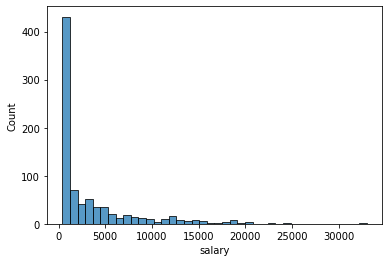

In [66]:
# salary does not follow a normal distribution
sns.histplot(salary)
mean_population = salary.mean()

In [70]:
# Segun la teoria del Central Limit Theory (CLT), la media de las muestras tiene una distrubucion Normal
means_salary = []
for i in range(10000):
    salary_samples= salary.sample(n=300, replace=True) # take a sample of 300 values with replacement
    means_salary.append(salary_samples.mean())

<AxesSubplot:ylabel='Count'>

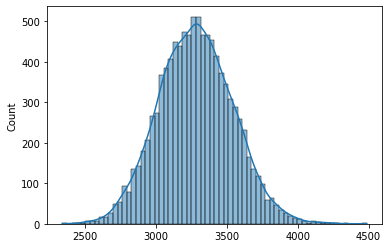

In [68]:
# mean_salary does follow a normal distribution
sns.histplot(means_salary,kde=True,line_kws={'color': 'red'})

In [69]:
print(f'Mean salary population is {round(mean_population,2)}')
print(f'Mean salary of samples mean is {round(np.mean(means_salary),2)}')


Mean salary population is 3281.83
Mean salary of samples mean is 3283.04


In [12]:
from scipy.stats import ttest_1samp,ttest_ind
#The test will tell us whether means of the sample and the population are different
#A one sample t-test is used to test whether or not the mean of a population is equal to some value.

res= ttest_1samp(a=means_salary,popmean=mean_population)
print(res)

Ttest_1sampResult(statistic=-0.35515660273328575, pvalue=0.7224797650979164)


In [44]:
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')

P-value is 72.25% and significance level (alpha) is 5% 


# resultado Exercici 1
* como P-value > alpha no podemos descartar la hipotesi nula de que la media de la poblacion es igual a la media de la muestra 
* por tanto la Hipotesis nula es valida: la media de la muestra es igual a la media de la poblacion (ya lo esperabamos a partir del teorema limite central) 

# Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [71]:
mlb.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [79]:
mlb.position.value_counts()

Pitcher              410
Outfielder           148
Catcher               67
Shortstop             56
Second Baseman        48
Third Baseman         46
First Baseman         42
Designated Hitter      7
Infielder              4
Name: position, dtype: int64

median salary for pitcher is  2999.197148780487


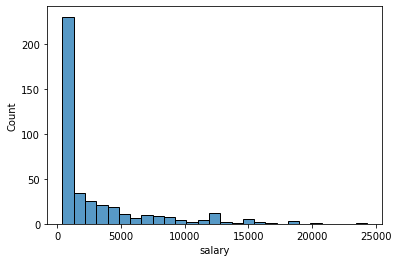

In [110]:
pitcher_salary = mlb[mlb.position=='Pitcher'].salary
sns.histplot(pitcher_salary)
print(f'median salary for pitcher is:', pitcher_salary.mean())


median salary for outfielder is 1937.220


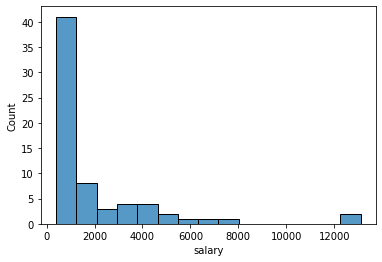

In [120]:
catcher_salary = mlb[mlb.position=='Catcher'].salary
sns.histplot(catcher_salary)
print(f'median salary for outfielder is %.3f' %catcher_salary.mean())


ttest_ind: Such a test tells us whether two data samples have different means. Here, we take the null hypothesis that both groups have equal means. We don’t need a known population parameter for this.

In [232]:
res = ttest_ind(a=pitcher_salary,b=catcher_salary)
print(res)

Ttest_indResult(statistic=2.0529115084742435, pvalue=0.04062838044148807)


In [124]:
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')

P-value is 4.06% and significance level (alpha) is 5% 


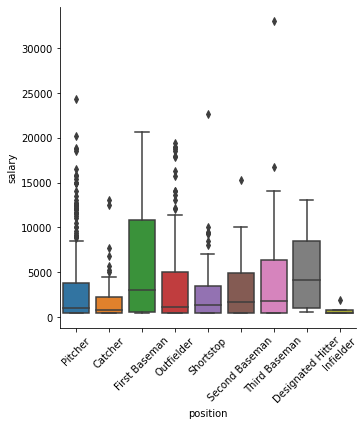

In [140]:
#### any outlier in the data?
chart =sns.catplot(x='position',y='salary',data = mlb,kind='box')
chart.set_xticklabels(rotation=45)

In [247]:
mlb[(mlb['position']=='Pitcher') | (mlb['position']=='Catcher')].head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0


In [248]:
# vamos a quitar los outliers de pitcher & catcher
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_clean = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return df_clean
    

<AxesSubplot:ylabel='Count'>

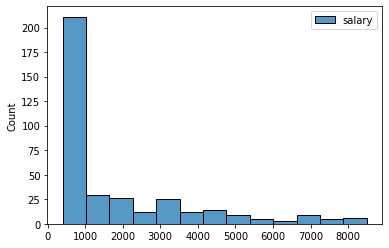

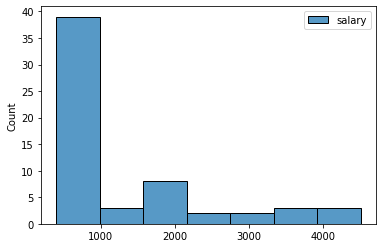

In [255]:
pitcher = mlb[mlb['position']=='Pitcher'][['salary']]
mask = remove_outliers(pitcher)
pitcher_outliers_removed = pitcher[mask]
pitcher_outliers_removed.dropna(inplace=True)
catcher = mlb[mlb['position']=='Catcher'][['salary']]
mask = remove_outliers(catcher)
catcher_outliers_removed = catcher[mask]
catcher_outliers_removed.dropna(inplace=True)
sns.histplot(pitcher_outliers_removed)
plt.figure()
sns.histplot(catcher_outliers_removed)


In [258]:
display(catcher_outliers_removed.mean())
display(pitcher_outliers_removed.mean())

salary    1229.062767
dtype: float64

salary    1795.796896
dtype: float64

In [259]:
res = ttest_ind(a=pitcher_outliers_removed.salary,b=catcher_outliers_removed.salary)
print(res)

Ttest_indResult(statistic=2.1406838501240544, pvalue=0.03286930245008045)


In [260]:
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')

P-value is 3.29% and significance level (alpha) is 5% 


# resultado Exercici 2

## sin quitar outliers
* como P-value < alpha, entonces SI podemos descartar la hipotesi nula de que la media de las 2 muestras son iguales.
* por tanto las 2 muestras tienen diferencia en salarios

## quitando outliers

*  como P-value << alpha, podemos descartar mas todavia la hipotesi nula de que la media de las 2 muestras son iguales.
*    por tanto las 2 muestras tienen diferencia en salarios


# Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.


Objectius

    Calcular el p-valor de diferents variable o conjunt de variables
    Interpretar el p-valor i dir si rebutja la hipòtesi nul·la

